# Gan implementation
### This is for my own understanding, so not optimized very much/at all

In [75]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [77]:
(trainX, trainY), (testX, testY) = tf.keras.datasets.mnist.load_data()

In [78]:
print(testY.shape)
print(testX.shape)
print(trainY.shape)
print(trainX.shape)

(10000,)
(10000, 28, 28)
(60000,)
(60000, 28, 28)


In [79]:
trainX = trainX.reshape((60000,784))
trainX = trainX/255.0

In [55]:
#use this to convert to one hot. it wont work with below code so rethink that

# trainY = keras.utils.to_categorical(trainY)#one hot encode trainY
# real_examples = np.concatenate((trainX,trainY),axis=1)
# real_examples.shape

(60000, 794)

In [97]:
gen_inputs = keras.Input(shape=(32,))
x = keras.layers.Dense(64,activation='sigmoid')(gen_inputs)
x = keras.layers.Dense(256,activation = 'sigmoid')(x)
gen_outputs = keras.layers.Dense(784)(x)
generator = keras.Model(gen_inputs,gen_outputs,name='generator')

disc_inputs = keras.Input(shape=(784,))
x = keras.layers.Dense(256,activation='relu')(disc_inputs)
x = keras.layers.Dense(64,activation='sigmoid')(x)
disc_outputs = keras.layers.Dense(1)(x)
discriminator = keras.Model(disc_inputs,disc_outputs)
#disc output is flag where 1=fake and 0=real

In [98]:
generator.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
)
discriminator.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
)

In [99]:
gan_input = keras.Input(shape=(32,))
x = generator(gan_input)
gan_output = discriminator(x)
gan = keras.Model(gan_input,gan_output,name='GAN')

In [100]:
gan.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
)

In [ ]:
#use to show function graph of gan

#keras.utils.plot_model(gan,show_shapes=True)

In [117]:
def train_gan(gan, generator, discriminator, real_examples, n_epochs=500,batch_size = 32):
    
    for epoch in range(n_epochs):
        
        real_batch = real_examples[np.random.randint(0,real_examples.shape[0],size= (batch_size,))]
        real_outputs = np.zeros((batch_size,1))
        
        batch_noise = np.random.uniform(size = (batch_size,generator.input_shape[1],))
        generated_batch = generator(batch_noise)
        generated_outputs = np.ones((batch_size,1))
        
        disc_inputs = np.concatenate([real_batch,generated_batch])
        disc_outputs = np.concatenate([real_outputs,generated_outputs])
        
        discriminator.trainable = True
        discriminator.train_on_batch(disc_inputs,disc_outputs)
        discriminator.trainable = False
        
        batch_noise = np.random.uniform(size = (batch_size,generator.input_shape[1],))
        batch_outputs = np.zeros((batch_size,1))
        gan.train_on_batch(batch_noise,batch_outputs)
        
        if epoch%20==0:
            print(f'epoch {epoch}')
            generate_and_show(generator)

epoch 0


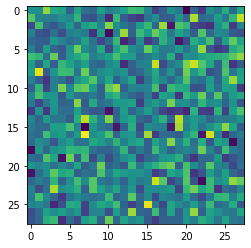

epoch 20


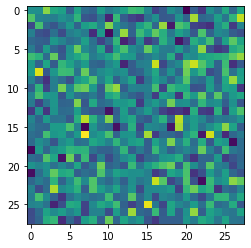

epoch 40


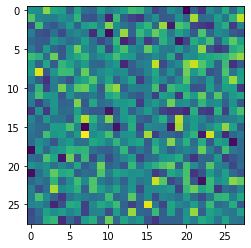

epoch 60


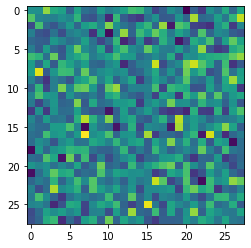

epoch 80


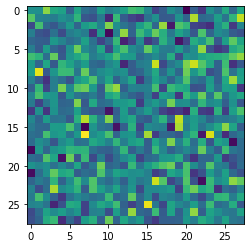

epoch 100


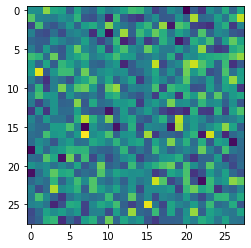

epoch 120


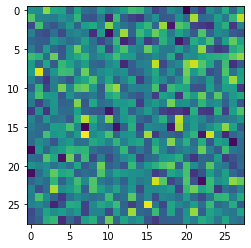

epoch 140


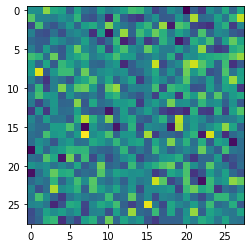

epoch 160


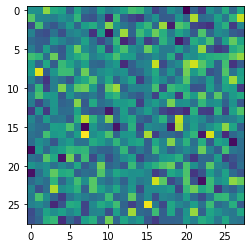

epoch 180


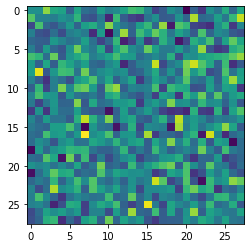

epoch 200


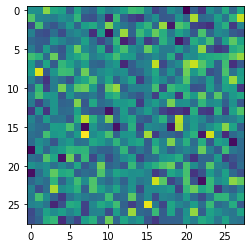

epoch 220


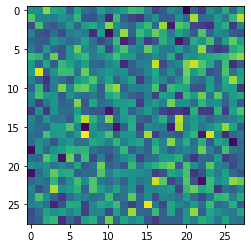

epoch 240


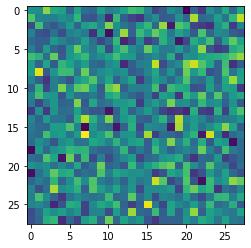

epoch 260


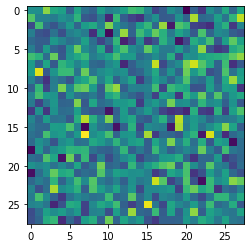

epoch 280


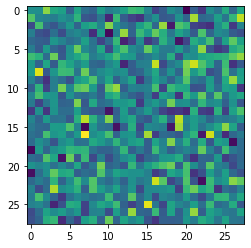

epoch 300


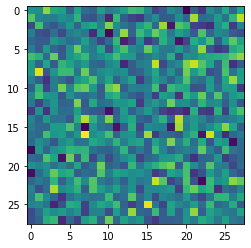

epoch 320


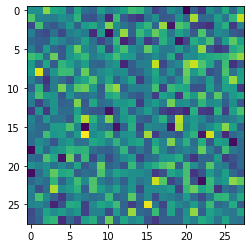

epoch 340


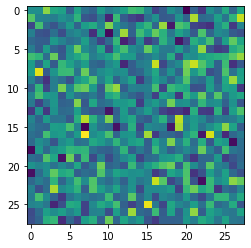

epoch 360


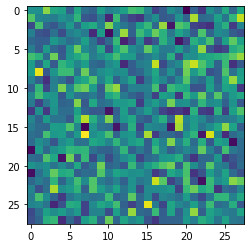

epoch 380


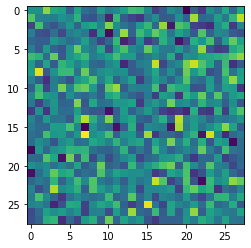

epoch 400


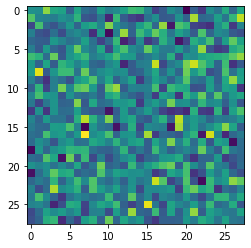

epoch 420


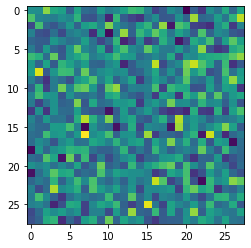

epoch 440


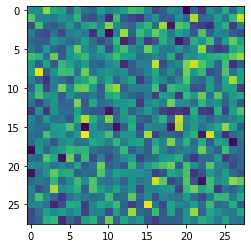

epoch 460


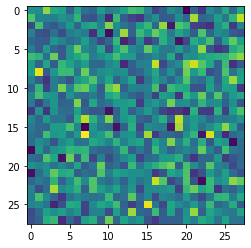

epoch 480


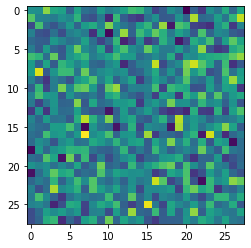

In [118]:
train_gan(gan,generator,discriminator,trainX)

In [112]:
def generate_and_show(generator):
    np.random.seed()
    noise = np.random.uniform(size=(1,generator.input_shape[1]))
    gen_img = generator.predict(noise)[0]
    gen_img = gen_img.reshape((28,28))
    plt.imshow(gen_img)
    plt.show()

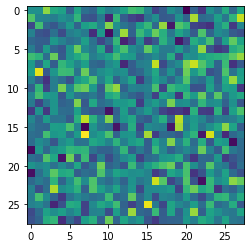

In [116]:
generate_and_show(generator)